In [78]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [79]:
# Hyper-parameters
epochs = 70
input_size = 1
output_size = 1
Learning_Rate = 0.01

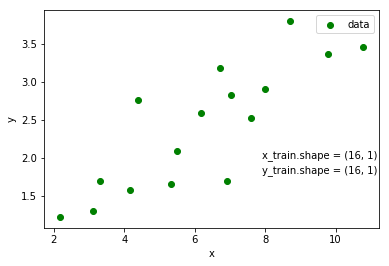

In [80]:
# Dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [8.7], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [3.8], [1.3]], dtype=np.float32)
plt.scatter(x_train,y_train,c='green',label='data')
plt.text(7.9,2,"x_train.shape = {shape}".format(shape=x_train.shape))
plt.text(7.9,1.8,"y_train.shape = {shape}".format(shape=y_train.shape))
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [81]:
# Linear model
class Model(nn.Module):
    def __init__(self,input_size,output_size):
        super(Model,self).__init__()
        self.n1 = nn.Linear(input_size,3)
        self.n2 = nn.Linear(3,output_size)
    def forward(self,x):
        x = F.relu(self.n1(x))
        x = self.n2(x)
        return x

In [82]:
model = Model(input_size=1,output_size=1)
print(model)

Model(
  (n1): Linear(in_features=1, out_features=3, bias=True)
  (n2): Linear(in_features=3, out_features=1, bias=True)
)


In [83]:
# Loss and optimizer
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=Learning_Rate)

epoch 0 loss = 4.478213787078857


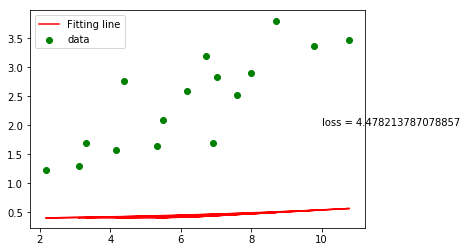

epoch 10 loss = 2.610947370529175


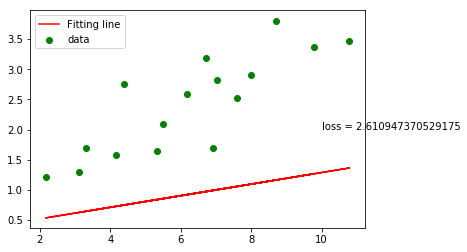

epoch 20 loss = 0.964143693447113


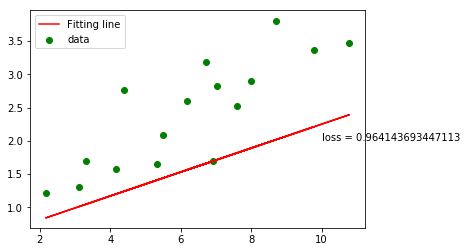

epoch 30 loss = 0.22006282210350037


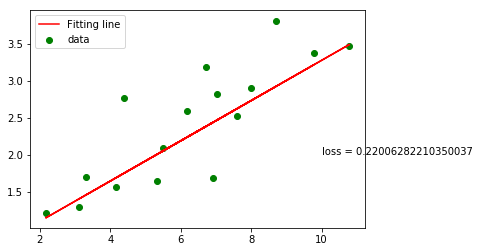

epoch 40 loss = 0.2550494372844696


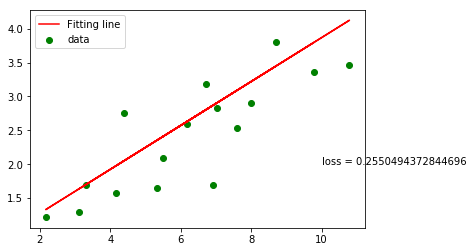

epoch 50 loss = 0.2248287945985794


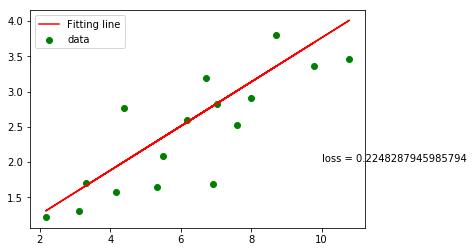

epoch 60 loss = 0.19289393723011017


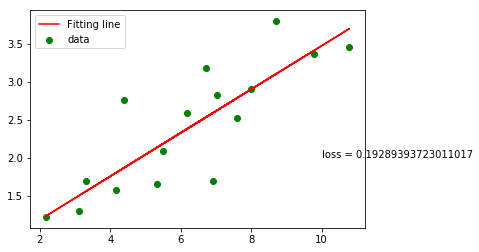

In [84]:
# Train our model
x = torch.from_numpy(x_train)
y = torch.from_numpy(y_train)

for epoch in range(epochs):
    
    # forward
    output = model(x) # predict a result
    loss = loss_func(output,y)
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%10 == 0:
        print('epoch {e} loss = {l}'.format(e=epoch,l=loss.item()))
        plt.scatter(x_train,y_train,c='green',label='data')
        plt.plot(x_train,output.data.numpy(),c='red',label='Fitting line')
        plt.text(10,2,"loss = {l}".format(l=loss.item()))
        plt.legend(loc='best')
        plt.show()